In [152]:
import pandas as pd
df=pd.read_csv('bitcon1.csv')
for i in range(1,6):
    df['lagr_'+str(i)]=df['Retur' \
                          'n'].shift(i)
df

,Date,Price,Open,High,Low,Amount,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
0,2012/12/10,13.4,13.4,13.6,13.3,24.67,0.0000,NaN,NaN,NaN,NaN,NaN
1,2012/12/11,13.6,13.4,13.7,13.3,28.05,0.0097,0.0000,NaN,NaN,NaN,NaN
2,2012/12/12,13.7,13.6,13.8,13.3,37.68,0.0103,0.0097,0.0000,NaN,NaN,NaN
3,2012/12/13,13.7,13.7,13.8,13.5,24.20,0.0000,0.0103,0.0097,0.0000,NaN,NaN
4,2012/12/14,13.6,13.7,13.9,13,70.14,-0.0073,0.0000,0.0103,0.0097,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022/12/6,"17,089.30","16,966.30","17,101.10","16,914.90",246.19,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
3649,2022/12/7,"16,835.20","17,089.40","17,126.70","16,715.30",244.36,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
3650,2022/12/8,"17,225.70","16,835.20","17,294.20","16,765.80",261.64,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122
3651,2022/12/9,"17,125.70","17,225.60","17,288.60","17,082.10",260.84,-0.0058,0.0232,-0.0149,0.0072,-0.0085,0.0135


In [153]:
import numpy as np

In [154]:
df.Date=pd.to_datetime(df.Date)
df

,Date,Price,Open,High,Low,Amount,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
0,2012-12-10,13.4,13.4,13.6,13.3,24.67,0.0000,NaN,NaN,NaN,NaN,NaN
1,2012-12-11,13.6,13.4,13.7,13.3,28.05,0.0097,0.0000,NaN,NaN,NaN,NaN
2,2012-12-12,13.7,13.6,13.8,13.3,37.68,0.0103,0.0097,0.0000,NaN,NaN,NaN
3,2012-12-13,13.7,13.7,13.8,13.5,24.20,0.0000,0.0103,0.0097,0.0000,NaN,NaN
4,2012-12-14,13.6,13.7,13.9,13,70.14,-0.0073,0.0000,0.0103,0.0097,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022-12-06,"17,089.30","16,966.30","17,101.10","16,914.90",246.19,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
3649,2022-12-07,"16,835.20","17,089.40","17,126.70","16,715.30",244.36,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
3650,2022-12-08,"17,225.70","16,835.20","17,294.20","16,765.80",261.64,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122
3651,2022-12-09,"17,125.70","17,225.60","17,288.60","17,082.10",260.84,-0.0058,0.0232,-0.0149,0.0072,-0.0085,0.0135


In [155]:
df.set_index('Date',inplace=True)

In [156]:
train_part=df.loc['2012-12-15':'2019-12-10',['Return','lagr_1','lagr_2','lagr_3','lagr_4','lagr_5']]
test_part=df.loc['2019-12-11':,['Return','lagr_1','lagr_2','lagr_3','lagr_4','lagr_5']]

In [157]:
train_part

,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
Date,,,,,,
2012-12-15,-0.0081,-0.0073,0.0000,0.0103,0.0097,0.0000
2012-12-16,-0.0141,-0.0081,-0.0073,0.0000,0.0103,0.0097
2012-12-17,-0.0038,-0.0141,-0.0081,-0.0073,0.0000,0.0103
2012-12-18,0.0038,-0.0038,-0.0141,-0.0081,-0.0073,0.0000
2012-12-19,0.0226,0.0038,-0.0038,-0.0141,-0.0081,-0.0073
...,...,...,...,...,...,...
2019-12-06,0.0178,0.0270,-0.0120,-0.0009,-0.0133,-0.0199
2019-12-07,-0.0026,0.0178,0.0270,-0.0120,-0.0009,-0.0133
2019-12-08,0.0018,-0.0026,0.0178,0.0270,-0.0120,-0.0009


In [158]:
test_part

,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
Date,,,,,,
2019-12-11,-0.0038,-0.0163,-0.0224,0.0018,-0.0026,0.0178
2019-12-12,0.0000,-0.0038,-0.0163,-0.0224,0.0018,-0.0026
2019-12-13,0.0065,0.0000,-0.0038,-0.0163,-0.0224,0.0018
2019-12-14,-0.0240,0.0065,0.0000,-0.0038,-0.0163,-0.0224
2019-12-15,0.0067,-0.0240,0.0065,0.0000,-0.0038,-0.0163
...,...,...,...,...,...,...
2022-12-06,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
2022-12-07,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
2022-12-08,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122


In [159]:
train_part=train_part.applymap(lambda x:x*100)
test_part=test_part.applymap(lambda x:x*100)

In [160]:
train_part
train_part.shape

(2552, 6)

In [161]:
X_train,Y_train=[],[]
for i in range(5,2552):
    X_train.append(train_part.iloc[i-5:i,1:])
    Y_train.append(train_part.iloc[i,:1])

X_train,Y_train=np.array(X_train),np.array(Y_train)

In [162]:
X_test,Y_test=[],[]
for i in range(5,1096):
    X_test.append(test_part.iloc[i-5:i,1:])
    Y_test.append(test_part.iloc[i,:1])

X_test,Y_test=np.array(X_test),np.array(Y_test)

In [163]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
from keras.layers import RepeatVector
import keras

In [164]:
X_train.shape[2]

5

In [165]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

adam = keras.optimizers.Adam(decay=0.2)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            68608     
                                                                 
 dense_8 (Dense)             (None, 5, 16)             2064      
                                                                 
 dense_9 (Dense)             (None, 5, 1)              17        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 训练模型
print(X_train.shape, Y_train.shape)
history = model.fit(X_train, Y_train, epochs=600, verbose=2, shuffle=False)
model.save("1-1.h5")

(2547, 5, 5) (2547, 1)
Epoch 1/600
80/80 - 2s - loss: 75.3900 - accuracy: 0.0082 - 2s/epoch - 20ms/step
Epoch 2/600
80/80 - 0s - loss: 75.2449 - accuracy: 0.0077 - 248ms/epoch - 3ms/step
Epoch 3/600
80/80 - 0s - loss: 75.0902 - accuracy: 0.0072 - 250ms/epoch - 3ms/step
Epoch 4/600
80/80 - 0s - loss: 74.9152 - accuracy: 0.0073 - 253ms/epoch - 3ms/step
Epoch 5/600
80/80 - 0s - loss: 74.6356 - accuracy: 0.0071 - 274ms/epoch - 3ms/step
Epoch 6/600
80/80 - 0s - loss: 74.2064 - accuracy: 0.0067 - 250ms/epoch - 3ms/step
Epoch 7/600
80/80 - 0s - loss: 73.7185 - accuracy: 0.0062 - 250ms/epoch - 3ms/step
Epoch 8/600
80/80 - 0s - loss: 73.2353 - accuracy: 0.0068 - 268ms/epoch - 3ms/step
Epoch 9/600
80/80 - 0s - loss: 72.5949 - accuracy: 0.0067 - 252ms/epoch - 3ms/step
Epoch 10/600
80/80 - 0s - loss: 71.5306 - accuracy: 0.0066 - 254ms/epoch - 3ms/step
Epoch 11/600
80/80 - 0s - loss: 70.5218 - accuracy: 0.0069 - 254ms/epoch - 3ms/step
Epoch 12/600
80/80 - 0s - loss: 69.3528 - accuracy: 0.0068 - 258

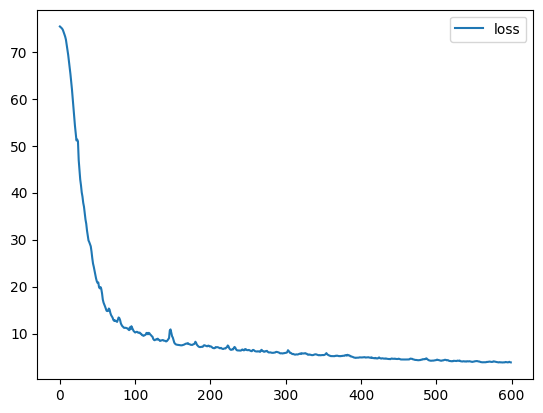

In [167]:
import matplotlib.pyplot as plt
# plot history
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

35/35 [==============================] - 0s 1ms/step


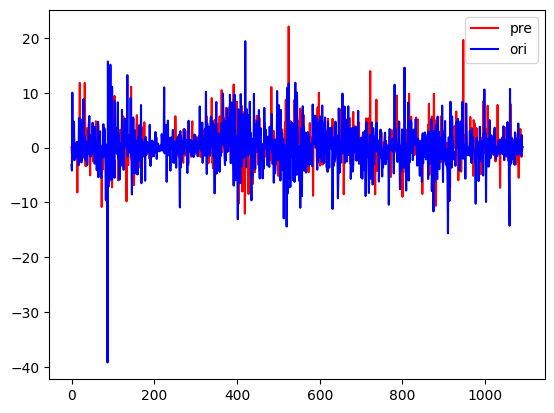

In [177]:
pre_test = model.predict(X_test)[:, -1, :]
pre_test = pre_test.reshape(pre_test.shape[0])

plt.plot(pre_test, label='pre', color='red')
plt.plot(Y_test, label='ori', color='blue')
plt.legend()
plt.show()

In [178]:
rmse = np.sqrt(np.mean(np.square(pre_test - Y_test)))
print(rmse)  # Output: 1.0

4.871710174116423


In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import linear_model, tree,ensemble,neural_network
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import *
from keras.layers import *
import keras.backend as K
from keras.callbacks import LearningRateScheduler

import keras.backend as K
from keras import Sequential
from keras.layers import Dense
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
batch_size = 10
import random
random.seed(1)

import numpy as np
np.random.seed(1)

from tensorflow import random
random.set_seed(1)

In [171]:
X_train.shape

(2547, 5, 5)

In [172]:
x_train=X_train[:,-1,:]
x_test=X_test[:,-1,:]

In [173]:
x_train.shape

(2547, 5)

In [182]:
model2 = ensemble.RandomForestRegressor(random_state=1)
model2.fit(x_train,Y_train)
pred = model2.predict(x_test)
rmse = np.sqrt(np.mean(np.square(pred - Y_test)))
print(rmse)  # Output: 1.0



/var/folders/f3/dyby91t52h9bl72v_94mzv1r0000gn/T/ipykernel_18237/273229208.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,Y_train)


4.46422925323139


In [183]:
model3 = tree.DecisionTreeRegressor(random_state=1)
model3.fit(x_train,Y_train)
pred = model3.predict(x_test)
rmse = np.sqrt(np.mean(np.square(pred - Y_test)))
print(rmse)  # Output: 1.0



5.783923982217662


In [184]:
model2 = ensemble.GradientBoostingRegressor(random_state=1)
model2.fit(x_train,Y_train)
pred = model2.predict(x_test)
rmse = np.sqrt(np.mean(np.square(pred - Y_test)))
print(rmse)  # Output: 1.0

/Users/lvjiaxin/opt/anaconda3/envs/tf2x/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.9949817642779957
